<a href="https://colab.research.google.com/github/Taro489/Tugas_IndividuBigData/blob/master/EDA_Spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1800018201

Tariq Roja A

# EDA dan pre-processing dataset

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www-eu.apache.org/dist/spark/spark-2.4.6/spark-2.4.6-bin-hadoop2.7.tgz
!tar xf spark-2.4.6-bin-hadoop2.7.tgz
!pip install -q findspark
!pip install -q pyspark_dist_explore

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.6-bin-hadoop2.7"

In [ ]:
import findspark
findspark.init("spark-2.4.6-bin-hadoop2.7")# SPARK_HOME
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
from pyspark.sql.functions import col, avg
import matplotlib.pyplot as plt
from pyspark_dist_explore import Histogram, hist

In [ ]:
sc = spark.sparkContext
spark = SparkSession(sc)

spotify_df = spark.read.csv("datasets_456949_861300_top10s.csv", header=True, inferSchema=True)
spotify_df.printSchema()            #mengecek schema dari dataset

root
 |-- _c0: integer (nullable = true)
 |-- title: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- top genre: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- bpm: integer (nullable = true)
 |-- nrgy: integer (nullable = true)
 |-- dnce: integer (nullable = true)
 |-- dB: integer (nullable = true)
 |-- live: integer (nullable = true)
 |-- val: integer (nullable = true)
 |-- dur: integer (nullable = true)
 |-- acous: integer (nullable = true)
 |-- spch: integer (nullable = true)
 |-- pop: integer (nullable = true)



In [ ]:
print("Jumlah total music : ")
spotify_df.count()

Jumlah total music : 


603

Pada kolom genre semua telah terisi dan tidak ada data yang kosong

In [ ]:
spotify_df.select("top genre").describe().show()
print("Jumlah kolom genre yang kosong : ")
spotify_df.where(col("top genre").isNull()).count()

+-------+--------------+
|summary|     top genre|
+-------+--------------+
|  count|           603|
|   mean|          null|
| stddev|          null|
|    min|  acoustic pop|
|    max|tropical house|
+-------+--------------+

Jumlah kolom genre yang kosong : 


0

Pada kolom year juga semua data telah terisi dan tidak ada yang kosong sehingga tidak perlu dilengkapi

In [ ]:
spotify_df.select("year").describe().show()
print("Jumlah kolom tahun yang kosong : ")
spotify_df.where(col("year").isNull()).count()

+-------+-----------------+
|summary|             year|
+-------+-----------------+
|  count|              603|
|   mean|2014.592039800995|
| stddev| 2.60705718410791|
|    min|             2010|
|    max|             2019|
+-------+-----------------+

Jumlah kolom tahun yang kosong : 


0

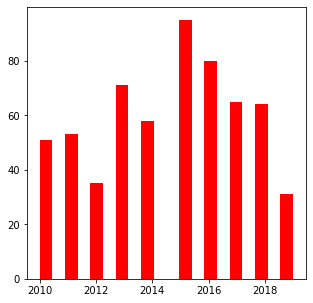

In [ ]:
spotify_df_year = titanic_df.select("year")

fig, axes = plt.subplots()
fig.set_size_inches(5, 5)
hist(axes, spotify_df_year, bins=20, color="red")
plt.show()